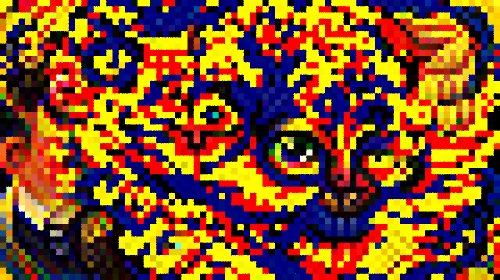<br>
"Face of cat in style of Louis Wain" with the fixed palette

# CLIPIT PixelDraw + palette enforcement demo

This notebook by <a href="https://twitter.com/altsoph">altsoph</a> is based on <a href="https://twitter.com/dribnet">dribnet</a>'s <a href='https://github.com/dribnet/clipit'>PixelDraw+CLIP</a>.<br>
This version has two new functions: palette enforcement and smoothness enforcement.

In [1]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. For setup,
#@markdown **you need to run this cell,
#@markdown then choose Runtime -> Restart Runtime from the menu,
#@markdown and then run the cell again**. It should remind you to
#@markdown do this after the first run.

#@markdown Setup can take 5-10 minutes, but once it is complete it usually does not need to be repeated
#@markdown until you close the window.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

# https://stackoverflow.com/a/56727659/1010653

from IPython.utils import io
with io.capture_output() as captured:
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/altsoph/clipit
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..

import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

Using device: cuda:0
Optimising using: AdamP
Using text prompts: ['Card queen of hearts. #pixelart']
Using seed: 2097760609550138465


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


iter: 0, loss: 2.85934, losses: 1.00429, 0.917225, 0.937818, 0, 0


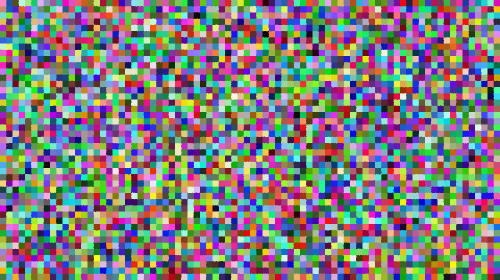

iter: 10, loss: 2.74864, losses: 0.965734, 0.838874, 0.864681, 0.0414349, 0.0379115
iter: 20, loss: 2.6209, losses: 0.908323, 0.772045, 0.785647, 0.0822893, 0.0725956


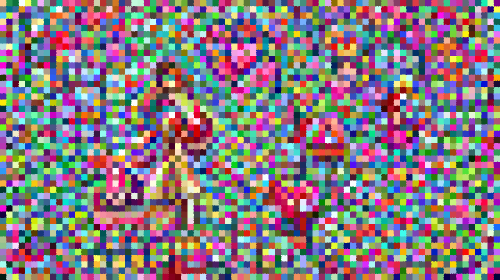

iter: 30, loss: 2.56124, losses: 0.865896, 0.735603, 0.738332, 0.121481, 0.0999256
iter: 40, loss: 2.55652, losses: 0.834704, 0.711797, 0.712905, 0.160881, 0.136233


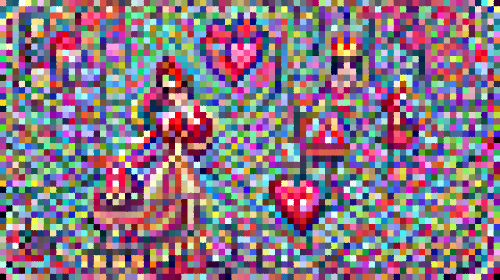

iter: 50, loss: 2.55531, losses: 0.815879, 0.687073, 0.682749, 0.20138, 0.168226
iter: 60, loss: 2.55833, losses: 0.792104, 0.667879, 0.664711, 0.23558, 0.198054


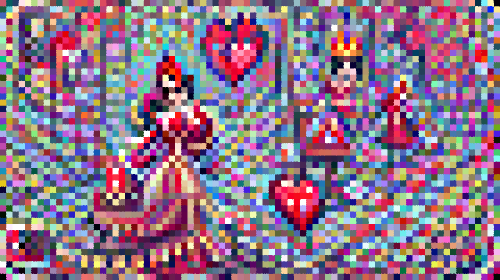

iter: 70, loss: 2.58763, losses: 0.782641, 0.663068, 0.663098, 0.267685, 0.211135
iter: 80, loss: 2.61339, losses: 0.777425, 0.653876, 0.653918, 0.295946, 0.232229


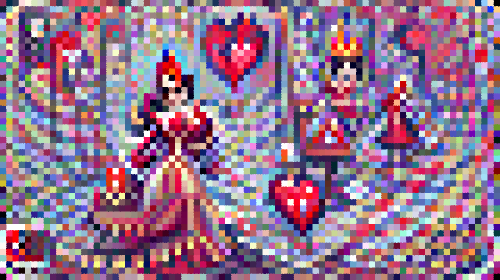

iter: 90, loss: 2.57463, losses: 0.729857, 0.609961, 0.587911, 0.334207, 0.312695
iter: 100, loss: 2.74178, losses: 0.787383, 0.654511, 0.650623, 0.356304, 0.292962


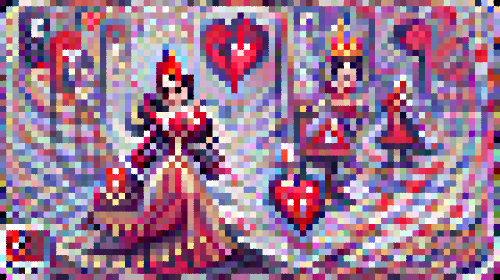

iter: 110, loss: 2.63012, losses: 0.7137, 0.59334, 0.575548, 0.372943, 0.374591
iter: 120, loss: 2.74997, losses: 0.762968, 0.614423, 0.617599, 0.40047, 0.354507


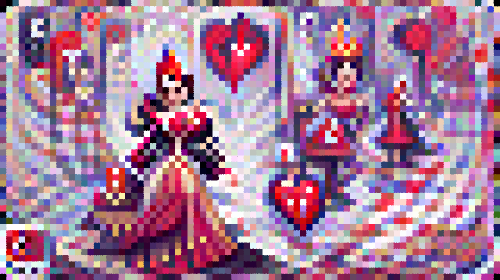

iter: 130, loss: 2.8163, losses: 0.76926, 0.6236, 0.630854, 0.411653, 0.380929
iter: 140, loss: 2.75492, losses: 0.711975, 0.577663, 0.558892, 0.42733, 0.479056


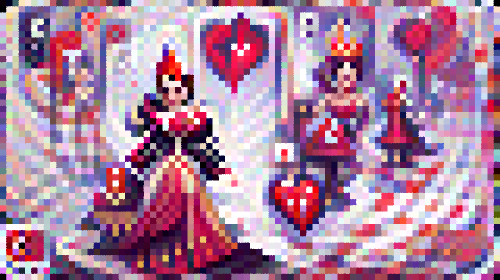

iter: 150, loss: 2.86236, losses: 0.771142, 0.626919, 0.627066, 0.420142, 0.417088
iter: 160, loss: 2.84863, losses: 0.739969, 0.595673, 0.591319, 0.436051, 0.485615


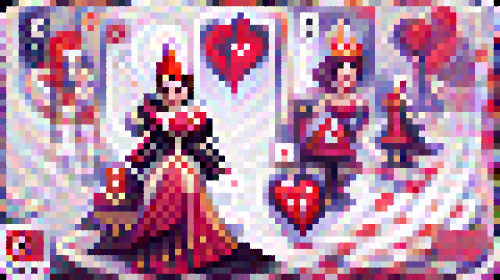

iter: 170, loss: 2.84005, losses: 0.747282, 0.610529, 0.609256, 0.441449, 0.431538
iter: 180, loss: 2.8942, losses: 0.743801, 0.603028, 0.601095, 0.445458, 0.500817


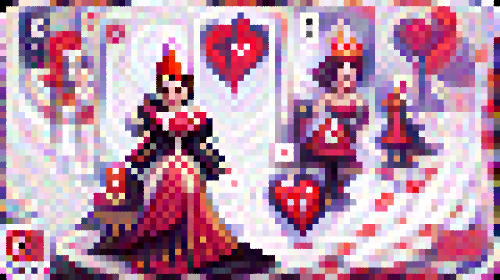

iter: 190, loss: 2.8423, losses: 0.710506, 0.585041, 0.555132, 0.440332, 0.551285
iter: 200, loss: 2.96712, losses: 0.747442, 0.608233, 0.606791, 0.458182, 0.546468


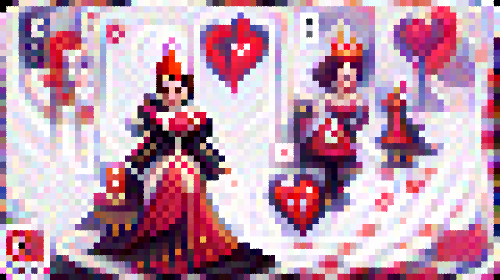

iter: 210, loss: 2.96351, losses: 0.743685, 0.604841, 0.599824, 0.45382, 0.561345
iter: 220, loss: 2.97946, losses: 0.711411, 0.579166, 0.552774, 0.460999, 0.675106


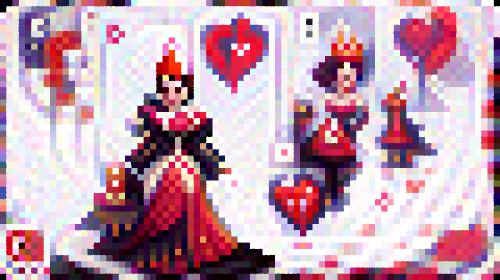

iter: 230, loss: 2.97191, losses: 0.715278, 0.583193, 0.557879, 0.452304, 0.663255
iter: 240, loss: 2.95484, losses: 0.701375, 0.574956, 0.554767, 0.452387, 0.67136


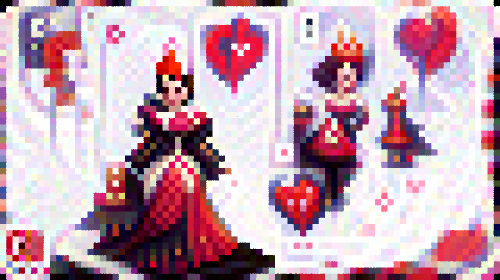

iter: 250, loss: 3.1025, losses: 0.759274, 0.621706, 0.614394, 0.473709, 0.633421
iter: 260, loss: 3.14118, losses: 0.744547, 0.607056, 0.604804, 0.490537, 0.694237


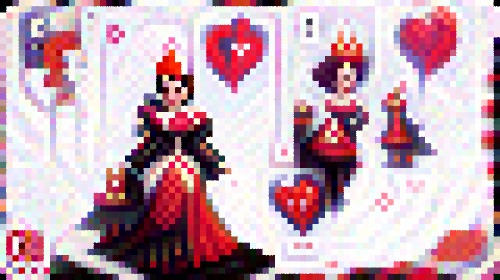

iter: 270, loss: 3.14692, losses: 0.770078, 0.628008, 0.618812, 0.484122, 0.6459
iter: 280, loss: 3.13093, losses: 0.719603, 0.589437, 0.562056, 0.475836, 0.784004


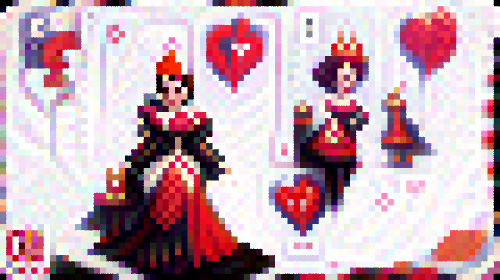

iter: 290, loss: 3.2756, losses: 0.717789, 0.584366, 0.555836, 0.514322, 0.903287
iter: 300, loss: 3.30638, losses: 0.765129, 0.61912, 0.612554, 0.526547, 0.783027


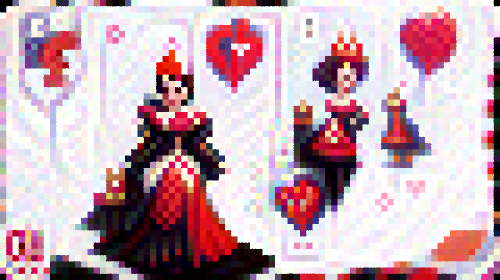

iter: 310, loss: 3.30383, losses: 0.762022, 0.627795, 0.619436, 0.52962, 0.764961
iter: 320, loss: 3.3576, losses: 0.76415, 0.620113, 0.614905, 0.553414, 0.805015


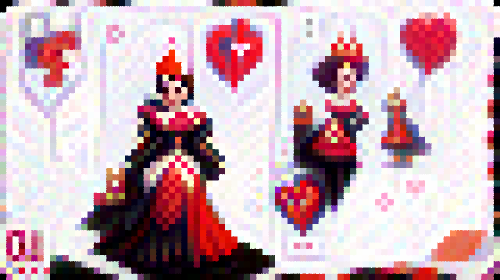

iter: 330, loss: 3.34999, losses: 0.760868, 0.62154, 0.615352, 0.548526, 0.803708
iter: 340, loss: 3.39882, losses: 0.716308, 0.587346, 0.558098, 0.540045, 0.997028


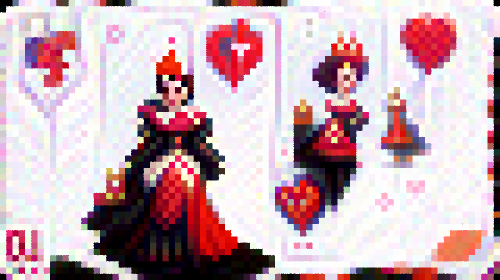

iter: 350, loss: 3.34912, losses: 0.725166, 0.584509, 0.558252, 0.532895, 0.948301
iter: 360, loss: 3.39736, losses: 0.721816, 0.590117, 0.559394, 0.540987, 0.985046


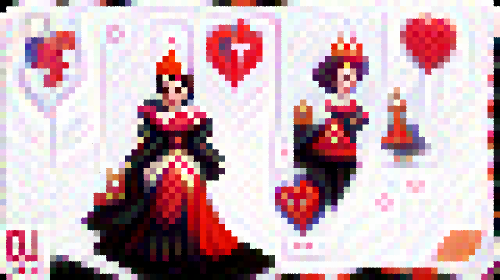

iter: 370, loss: 3.52421, losses: 0.785538, 0.640762, 0.637047, 0.577762, 0.883097
iter: 380, loss: 3.48216, losses: 0.75896, 0.617556, 0.616079, 0.585904, 0.903666


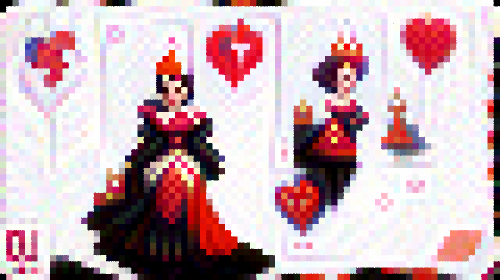

iter: 390, loss: 3.55646, losses: 0.748447, 0.60681, 0.599166, 0.604503, 0.997532
iter: 400, loss: 3.58601, losses: 0.77319, 0.636705, 0.636272, 0.596317, 0.943523


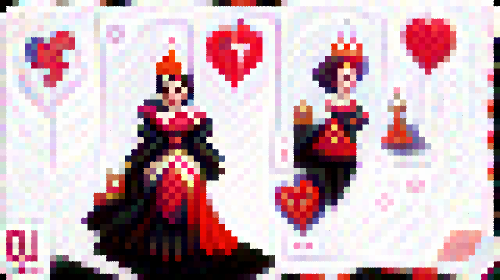

iter: 410, loss: 3.73388, losses: 0.77846, 0.626435, 0.625788, 0.626982, 1.07621
iter: 420, loss: 3.63325, losses: 0.772155, 0.630976, 0.625337, 0.63122, 0.973559


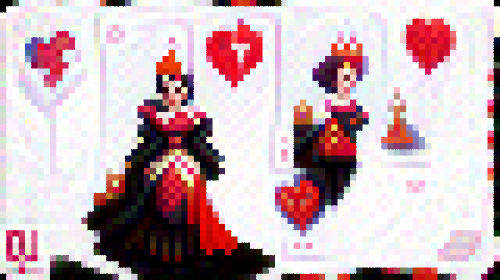

iter: 430, loss: 3.54753, losses: 0.76132, 0.62538, 0.62109, 0.58654, 0.953202
iter: 440, loss: 3.61876, losses: 0.725345, 0.601985, 0.574025, 0.58692, 1.13048


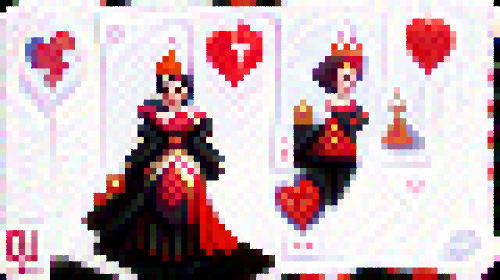

iter: 450, loss: 3.6619, losses: 0.726868, 0.59248, 0.567433, 0.608854, 1.16627
iter: 460, loss: 3.69863, losses: 0.762063, 0.626622, 0.621876, 0.643128, 1.04495


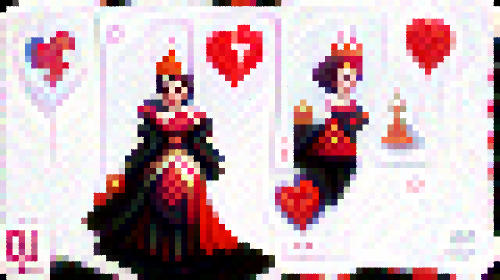

iter: 470, loss: 3.73764, losses: 0.779966, 0.64311, 0.637432, 0.643446, 1.03368
iter: 480, loss: 3.79782, losses: 0.73319, 0.600564, 0.576046, 0.627525, 1.26049


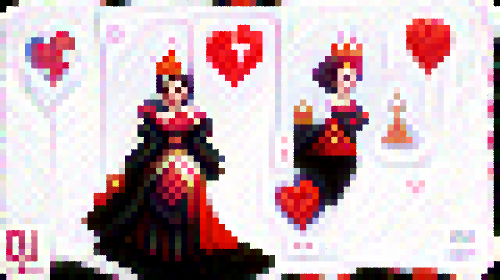

iter: 490, loss: 3.9816, losses: 0.793895, 0.637674, 0.637202, 0.699798, 1.21303
iter: 500, loss: 3.98647, losses: 0.802501, 0.657443, 0.654068, 0.674513, 1.19795


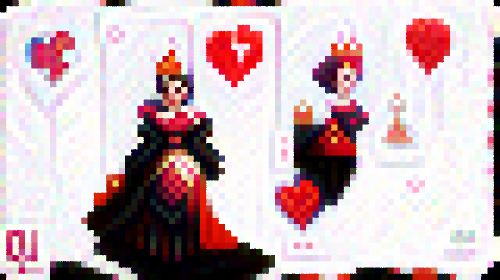

In [5]:
#@title Settings

#@markdown Enter a description of what you want to draw - I usually add #pixelart to the prompt.
#@markdown If PixelDraw is not used, it will use VQGAN instead.
#@markdown <br>

prompts = "Card queen of hearts. #pixelart" #@param {type:"string"}

aspect = "widescreen" #@param ["widescreen", "square"]

use_pixeldraw = True #@param {type:"boolean"}

#@markdown Select the desired palette (None for default):
force_palette = "custom" #@param ["None", "grayscale", "red", "green", "blue", "orange", "custom"]
#@markdown To specify your own palette, select "custom" in the field above and put the comma-separated list of hex colors in the field below 
# (for example: #000000, #ff0000, #ffff00, #000080):
use_palette = "#000000, #ffffff, #ff0000, #0000ff, #ffff00" #@param {type:"string"}
#@markdown Use this parameter to specify the speed of palette enforcement (lower value -- faster), try to start with values like 10*number of iterations:
palette_annealing = 5000 #@param {type:"string"}


#@markdown Use this parameter to activate the smoothess enforcement:
force_smoothness = True #@param {type:"boolean"}

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and start generating images below.

#@markdown When that is done you can change these
#@markdown settings and see if you get different results. Or if you get
#@markdown impatient, just select "Runtime -> Interrupt Execution".
#@markdown Note that the first time you run it may take a bit longer
#@markdown as nessary files are downloaded.


#@markdown
#@markdown *Advanced: you can also edit this cell and add add additional
#@markdown settings, combining settings from different notebooks.*


# Simple setup
import clipit

# these are good settings for pixeldraw
clipit.reset_settings()
clipit.add_settings(prompts=prompts, aspect=aspect)
clipit.add_settings(quality="better", scale=2.5)
clipit.add_settings(use_pixeldraw=use_pixeldraw)

palette = None

if force_palette == "custom" and use_palette.strip():
  import matplotlib.colors
  palette = [matplotlib.colors.to_rgb(c.strip()) for c in use_palette.strip().split(',')]
elif force_palette == "green":
  palette = [[0.44*i*16/256,i*16/256,0.53*i*16/256] for i in range(16)]
elif force_palette == "orange":
  palette = [[i*16/256,0.8*i*16/256,0.2*i*16/256] for i in range(16)]
elif force_palette == "blue":
  palette = [[0.44*i*16/256,0.53*i*16/256,i*16/256] for i in range(16)]
elif force_palette == "red":
  palette = [[i*16/256,0.53*i*16/256,0.44*i*16/256] for i in range(16)]
elif force_palette == "grayscale":
  palette = [[i*16/256,i*16/256,i*16/256] for i in range(16)]

if palette and palette_annealing:
  clipit.add_settings(target_palette=palette, enforce_palette_annealing=palette_annealing)

if force_smoothness:
  clipit.add_settings(enforce_smoothness=50)

#### YOU CAN ADD YOUR OWN CUSTOM SETTING HERE ####
# this is the example of how to run longer with less frequent display
# clipit.add_settings(iterations=500, display_every=50)


settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)
